In [1]:
!pip install catboost

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [3]:
# anonymize data
# cat: categorical
# cont: continuous
data_train = pd.read_csv('data/train.csv')
data_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
data_train.shape

(188318, 132)

In [5]:
data_train.isnull().sum().sum()

0

In [6]:
data_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [8]:
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cont_pattern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cat_col = [cat for cat in data_train.columns if cat_pattern.match(cat)]
cont_col = [cont for cont in data_train.columns if cont_pattern.match(cont)]
cat_col[:5], cont_col[:5]

(['cat1', 'cat2', 'cat3', 'cat4', 'cat5'],
 ['cont1', 'cont2', 'cont3', 'cont4', 'cont5'])

In [9]:
cat_index = np.array([i for i in range(0, len(cat_col))])
cont_index = np.array([i for i in range(0, len(cont_col))])
cont_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

<Axes: xlabel='loss', ylabel='Density'>

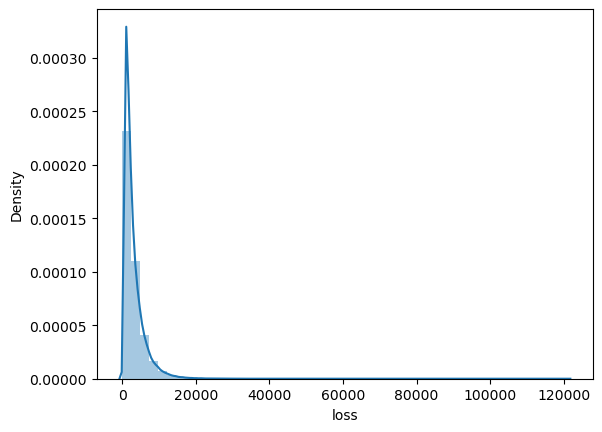

In [10]:
sns.distplot(data_train['loss'])

<Axes: xlabel='loss', ylabel='Density'>

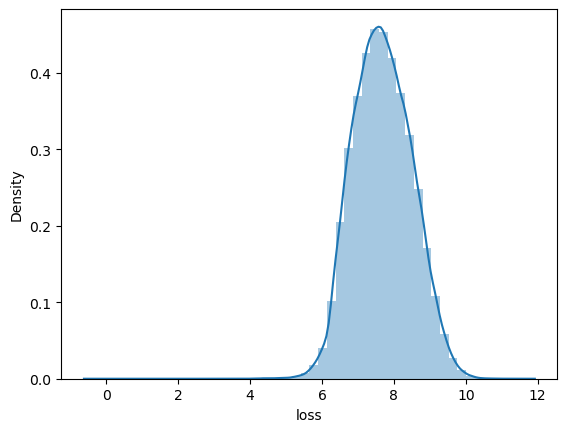

In [11]:
sns.distplot(np.log(data_train['loss']))

In [12]:
model = CatBoostRegressor(iterations=150,
                          learning_rate=0.01,
                          depth=10,
                          eval_metric='MAE',
                          verbose=5,
                          snapshot_file='log',
                          snapshot_interval=10, 
                         )

In [13]:
X = data_train.drop(['id', 'loss'], axis=1)
y = np.log(data_train['loss'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
del X
del y
del data_train

In [14]:
model.fit(X_train, y_train, cat_features=cat_col, eval_set=(X_test, y_test))

0:	learn: 0.6581072	test: 0.6546054	best: 0.6546054 (0)	total: 302ms	remaining: 45.1s
5:	learn: 0.6452309	test: 0.6418901	best: 0.6418901 (5)	total: 1.3s	remaining: 31.2s
10:	learn: 0.6331706	test: 0.6299788	best: 0.6299788 (10)	total: 2.2s	remaining: 27.8s
15:	learn: 0.6215449	test: 0.6185032	best: 0.6185032 (15)	total: 3.1s	remaining: 25.9s
20:	learn: 0.6105965	test: 0.6076521	best: 0.6076521 (20)	total: 4.03s	remaining: 24.7s
25:	learn: 0.6005673	test: 0.5977816	best: 0.5977816 (25)	total: 5.14s	remaining: 24.5s
30:	learn: 0.5912517	test: 0.5886028	best: 0.5886028 (30)	total: 6.21s	remaining: 23.8s
35:	learn: 0.5825124	test: 0.5800203	best: 0.5800203 (35)	total: 7.11s	remaining: 22.5s
40:	learn: 0.5743238	test: 0.5719623	best: 0.5719623 (40)	total: 8.03s	remaining: 21.4s
45:	learn: 0.5665533	test: 0.5643255	best: 0.5643255 (45)	total: 8.93s	remaining: 20.2s
50:	learn: 0.5591991	test: 0.5571394	best: 0.5571394 (50)	total: 9.84s	remaining: 19.1s
55:	learn: 0.5523347	test: 0.5504255	be

In [15]:
np.exp(0.475879835)

1.6094296072294367

In [20]:
np.mean(y_train)

7.684105716123294

In [21]:
np.std(y_train)

0.8131850286980582